In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r'C:\Users\devan\Desktop\CODING\Diwali_Lightings_Dataset.csv')
print(df.head())

   CustomerID CustomerName  Gender  Age Marital_Status           State  \
0        3102   Customer_1  Female   33        Married           Delhi   
1        3435   Customer_2  Female   30        Married           Bihar   
2        3860   Customer_3    Male   59         Single  Madhya Pradesh   
3        3270   Customer_4  Female   47        Married           Bihar   
4        3106   Customer_5    Male   36         Single     Maharashtra   

     City  Occupation       Product_Name  Price  Quantity_Sold  Discount(%)  \
0  Mumbai     Student      Jhalar Lights    545              4           21   
1  Mumbai   Education      Candle Lights    769              1            6   
2   Patna     Student      Jhalar Lights    732              3            2   
3   Patna  Healthcare  LED String Lights    154              2           22   
4  Mumbai          IT  LED String Lights   1011              4           13   

   PaymentMode        Date  Total_Amount      Profit  
0   Debit Card  2024-10-2

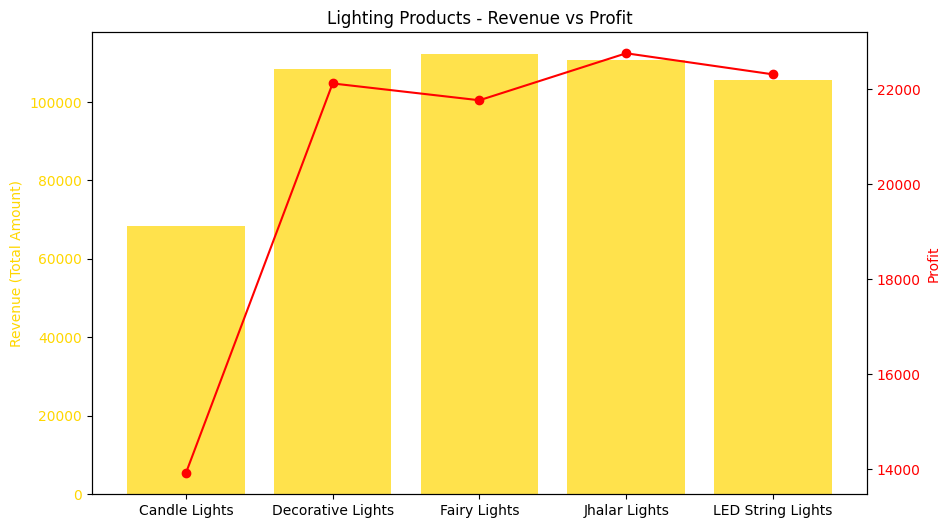

In [7]:
import matplotlib.pyplot as plt

# Group by product
dual = df.groupby('Product_Name', as_index=False)[['Total_Amount','Profit']].sum()

fig, ax1 = plt.subplots(figsize=(10,6))

# Plot revenue (bar)
ax1.bar(dual['Product_Name'], dual['Total_Amount'], color='gold', alpha=0.7, label='Revenue')
ax1.set_ylabel('Revenue (Total Amount)', color='gold')
ax1.tick_params(axis='y', labelcolor='gold')

# Create second axis for profit
ax2 = ax1.twinx()
ax2.plot(dual['Product_Name'], dual['Profit'], color='red', marker='o', label='Profit')
ax2.set_ylabel('Profit', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Lighting Products - Revenue vs Profit")
plt.xticks(rotation=45)
plt.show()


Distribution of lightings
Product_Name
Candle Lights        34946
Decorative Lights    49599
Fairy Lights         47159
Jhalar Lights        45337
LED String Lights    46372
Name: Price, dtype: int64


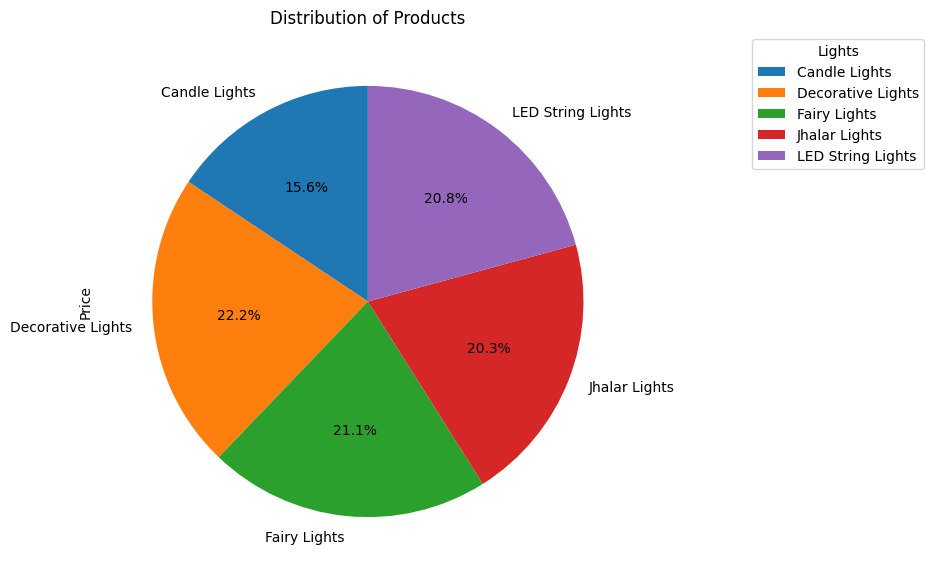

In [37]:
print('Distribution of lightings')


dist = df.groupby('Product_Name', as_index=True)['Price'].sum()
print(dist)


plt.figure(figsize=(7,7))
dist.plot(
    kind = 'pie',
    autopct='%1.1f%%', 
    startangle=90,
    legend = True
)

plt.title('Distribution of Products')
plt.legend(title='Lights', bbox_to_anchor=(1.2, 1))
plt.show()


Products with total revenue and profit
                   Total_Amount    Profit
Product_Name                             
Candle Lights          68413.31  13917.05
Decorative Lights     108327.18  22126.90
Fairy Lights          112161.25  21772.68
Jhalar Lights         110601.26  22762.20
LED String Lights     105541.17  22318.33


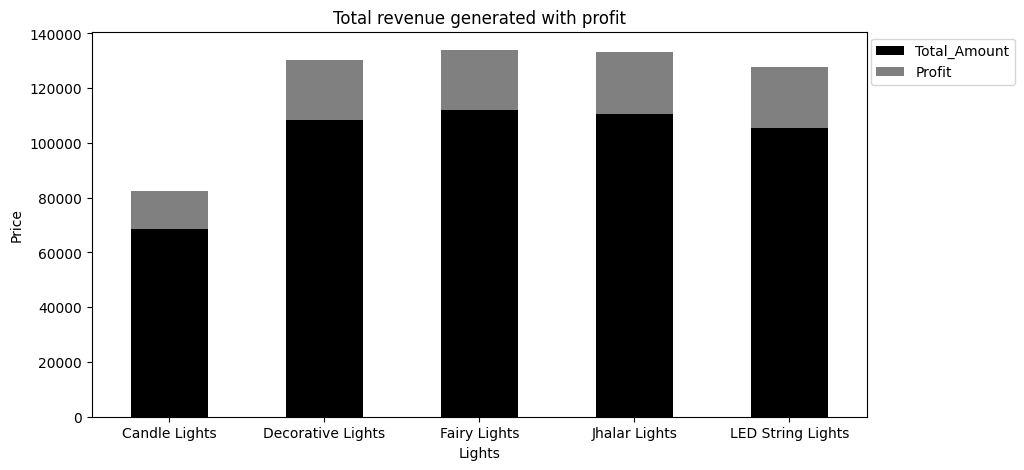

In [50]:
print('Products with total revenue and profit')
revenue_profit = df.groupby('Product_Name')[['Total_Amount', 'Profit']].sum().round(2)
print(revenue_profit)

ax = revenue_profit.plot(kind = 'bar', stacked = True, color = ['black', 'grey'], figsize=(10,5), legend = True)
plt.title('Total revenue generated with profit')
plt.xlabel('Lights')
plt.ylabel('Price')
plt.legend(bbox_to_anchor = (1.2,1), loc = 'upper right')
plt.xticks(rotation = 0)
plt.show()

Trend of sales per day
Date
2024-10-25    43847.58
2024-10-26    68285.14
2024-10-27    68169.85
2024-10-28    33222.32
2024-10-29    62956.12
2024-10-30    52460.23
2024-10-31    39879.77
2024-11-01    48886.02
2024-11-02    41909.47
2024-11-03    45427.67
Name: Total_Amount, dtype: float64


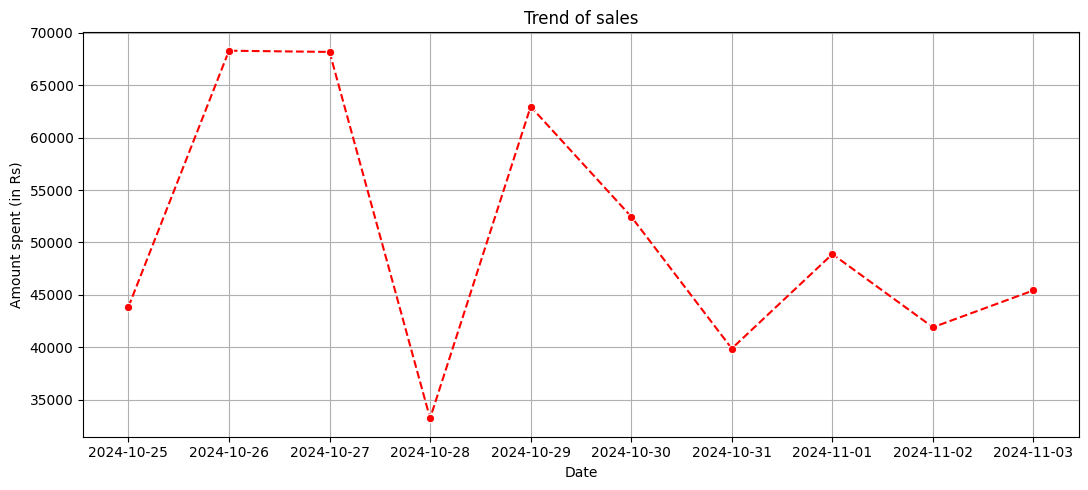

In [68]:
print('Trend of sales per day')
trend = df.groupby('Date', as_index = True)['Total_Amount'].sum()
print(trend)
plt.figure(figsize = (11,5))
ax = sns.lineplot(data=trend, linestyle = 'dashed', marker = 'o', color = 'red')
plt.title('Trend of sales')
plt.xlabel('Date')
plt.ylabel('Amount spent (in Rs)')
plt.grid(True)
plt.tight_layout()
plt.show()

Price vs Sold Quantities
        Product_Name  Price  Quantity_Sold
0      Candle Lights  34946            109
1  Decorative Lights  49599            153
2       Fairy Lights  47159            173
3      Jhalar Lights  45337            167
4  LED String Lights  46372            152


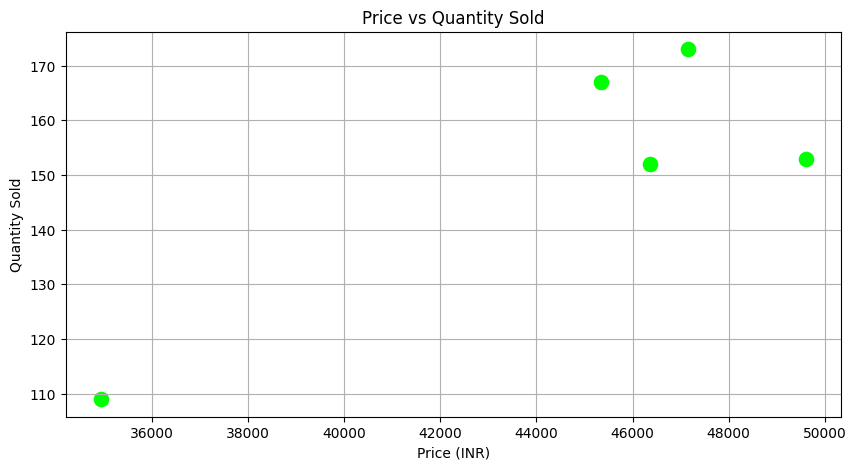

In [70]:
print('Price vs Sold Quantities')

price_vs_quantity = df.groupby('Product_Name', as_index=False)[['Price', 'Quantity_Sold']].sum()
print(price_vs_quantity)

plt.figure(figsize=(10,5))
ax = sns.scatterplot(data=price_vs_quantity, x='Price', y='Quantity_Sold', color='lime', s = 150)


plt.title('Price vs Quantity Sold')
plt.xlabel('Price (INR)')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()



States with most sales
State
Maharashtra        96018.0
Madhya Pradesh     97350.0
Bihar              98065.0
Delhi             103649.0
Uttar Pradesh     109963.0
Name: Total_Amount, dtype: float64


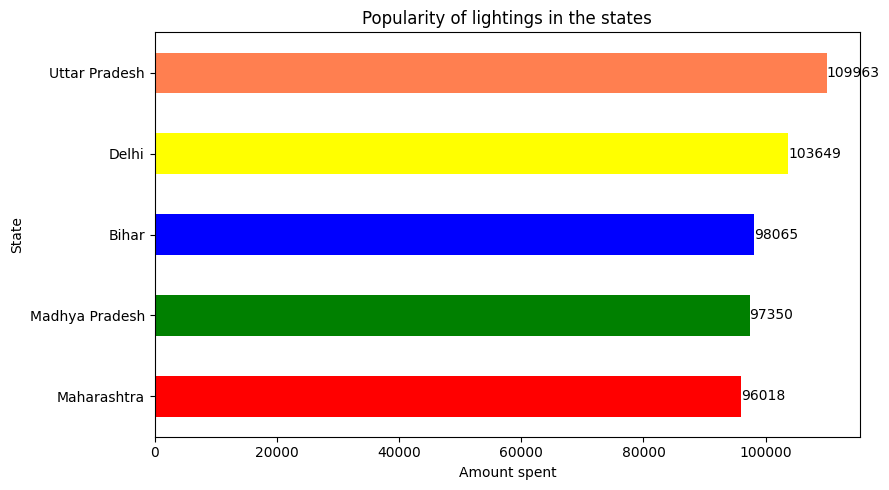

In [18]:
print('States with most sales')

most_sales = df.groupby('State', as_index = True)['Total_Amount'].sum().sort_values(ascending = True).round(0)
print(most_sales)

ax = most_sales.plot(kind = 'barh', color = ['red', 'Green', 'Blue', 'yellow', 'coral'], figsize = (9,5))
for container in ax.containers:
    ax.bar_label(container)

plt.title('Popularity of lightings in the states')
plt.xlabel('Amount spent')
plt.ylabel('State')
plt.tight_layout()

plt.show()


Discount percentage
Product_Name
Candle Lights        13.44
Decorative Lights    12.33
Fairy Lights         12.18
Jhalar Lights        10.79
LED String Lights    12.00
Name: Discount(%), dtype: float64


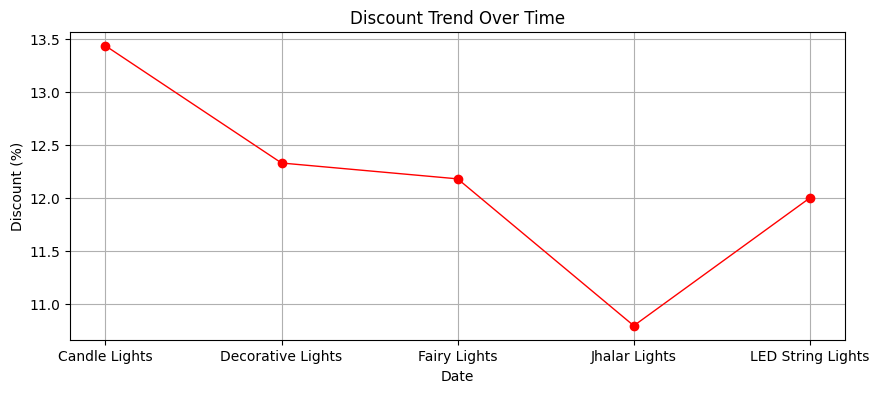

In [ ]:
print('Discount percentage')

discount_percentage = df.groupby('Product_Name', as_index = True)['Discount(%)'].mean().round(2)
print(discount_percentage)



plt.figure(figsize=(10,4))
plt.plot(discount_percentage, color='red', linewidth=1, marker='o')

plt.title("Discount Trend Over Time")
plt.xlabel("Product Name")
plt.ylabel("Discount (%)")
plt.grid(True)
plt.show()
